# Homework 6

TFCB 2022

Due date: Nov 17, 2022 1PM

In this homework, we will work through a series of manipulations to analyze a published deep sequencing
dataset using `tidyverse` functions.

In the process, we will learn some new functions in `tidyverse` and apply
them to our data analysis.

For more information about the data used in this homework, see
[this page](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE89183).


In [283]:
library(tidyverse)

## Problem 1

**10 points**

For each of the following functions, provide a <100 character description
(in your own words) and a URL reference.

1. `!` 
reverses function's logical value when placed in front of it such as !TRUE == FALSE
https://statisticsglobe.com/r-is-na-function/

2. `is.na`
function checks whether data is missing (i.e. NA (not available)), and if so, then its logical value is TRUE
https://statisticsglobe.com/r-is-na-function/

3. `is.numeric`
tests whether an object can be interpreted as an integer and returns TRUE, otherwise it will return FALSE if not an integer
https://r-lang.com/as-numeric-r/

4. `anti_join`
returns all values of a row in a dataframe that do not match the values of a row in another data frame and can also take mutliple argument that are multiple columns to search through
https://www.statology.org/dplyr-anti-join/

5. `desc`
sorts a variable by descending order which is helpful when used within arrange() function
https://cmdlinetips.com/2020/08/dplyr-arrange-sort-reorder-by-variable/

6. `dplyr::slice`
the slice() function in the dplyr package allows you to subset rows from a dataframe by row number (index position) but can also be used to slice by range or drop rows using negative values to indicate rows
https://sparkbyexamples.com/r-programming/r-dplyr-slice-function/#:~:text=slice()%20from%20dplyr%20in%20R%20%E2%80%93%20Examples&text=The%20slice()%20function%20from,groups%2C%20and%20data%20frame%20attributes

7. `dplyr::across`
the across() function in the dplyr package allows you to transform data multiple into columns. across() can be used within summarise() and mutate() functions
https://dplyr.tidyverse.org/reference/across.html



## Problem 2

**10 points**

Add a comment above each code line below explaining what the code line does and/or why
that code line is necessary.

Keep each comment to less than 2 lines per line of code and < 80 chars per line.

In [284]:
#read txt file as tab separated values, assign to annotations
annotations <- read_tsv("ftp://ftp.ebi.ac.uk/pub/databases/genenames/new/tsv/locus_groups/protein-coding_gene.txt") %>%
# look annotations and select specificed columns from file
  select(ensembl_gene_id, symbol, name, gene_group, ccds_id) %>%
# filter out rows with missing values in ccds_id column
  filter(!is.na(ccds_id)) %>%
#print selected columns and without rows missing values in ccds_id
  print()

Warning message:
“One or more parsing issues, see `problems()` for details”
Rows: 19229 Columns: 54
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (39): hgnc_id, symbol, name, locus_group, locus_type, status, location,...
dbl   (3): entrez_id, homeodb, orphanet
lgl   (8): mirbase, snornabase, imgt, kznf_gene_catalog, mamit-trnadb, lncrn...
date  (4): date_approved_reserved, date_symbol_changed, date_name_changed, d...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 18,785 × 5
   ensembl_gene_id symbol  name                               gene_group ccds_id
   <chr>           <chr>   <chr>                              <chr>      <chr>  
 1 ENSG00000121410 A1BG    alpha-1-B glycoprotein             Immunoglo… CCDS12…
 2 ENSG00000148584 A1CF    APOBEC1 complementation factor     RNA bindi… CCDS72…
 3 ENSG00000175899 A2M     alpha-2-macroglobulin              Alpha-2-m… CCDS44…
 4 ENSG00000166535 A2ML1   alpha-2-macroglobulin like 1       Alpha-2-m… CCDS85…
 5 ENSG00000184389 A3GALT2 alpha 1,3-galactosyltransferase 2  Glycosylt… CCDS60…
 6 ENSG00000128274 A4GALT  alpha 1,4-galactosyltransferase (… Alpha 1,4… CCDS14…
 7 ENSG00000118017 A4GNT   alpha-1,4-N-acetylglucosaminyltra… Alpha 1,4… CCDS30…
 8 ENSG00000094914 AAAS    aladin WD repeat nucleoporin       WD repeat… CCDS53…
 9 ENSG00000081760 AACS    acetoacetyl-CoA synthetase         Acyl-CoA … CCDS92…
10 ENSG00000114771 AADAC   arylacetamide deacetylase          Lipases|A… CCDS33…
# … w

In [285]:
#read compressed txt file as tsv and assign data
data <- read_tsv("ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE89nnn/GSE89183/suppl/GSE89183_Counts.txt.gz") %>%
#rename column 'ENSEMBL gene' in data to new name
  rename(ensembl_gene_id = `ENSEMBL gene`) %>%
#prints dataframe with renamed column
  print()

Rows: 63677 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (1): ENSEMBL gene
dbl (14): CD34_shTSR2_RNA_1, CD34_shTSR2_RNA_2, CD34_shRPL5_RNA_1, CD34_shRP...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 63,677 × 15
   ensembl_gene_id CD34_shTSR2_RNA_1 CD34_shTSR2_RNA_2 CD34_shRPL5_RNA_1
   <chr>                       <dbl>             <dbl>             <dbl>
 1 ENSG00000000003                48                56                40
 2 ENSG00000000005                 0                 2                 0
 3 ENSG00000000419               880               744              1116
 4 ENSG00000000457               124               113               149
 5 ENSG00000000460               249               262               289
 6 ENSG00000000938                89                64               204
 7 ENSG00000000971               106                86               241
 8 ENSG00000001036               897               613              1487
 9 ENSG00000001084               965              1027              1036
10 ENSG00000001167               721               835               498
# … with 63,667 more rows, and 11 more variables: CD34_shRPL5_RNA_2 <dbl>,
#   CD34_shRPL5_RPF_1 <db

## Problem 3

**10 points**

Using the code below:

1. Convert both axes to `log10` instead of linear scales.
2. Show axis tick labels as 10^0^, 10^1^, 10^2^,10^3^, 10^4^, 10^5^ for both axes.
3. There are too many points overlapping in certain regions. Use a different
`geom_` function to convey to your reader how many overlapping points are present
in each region.

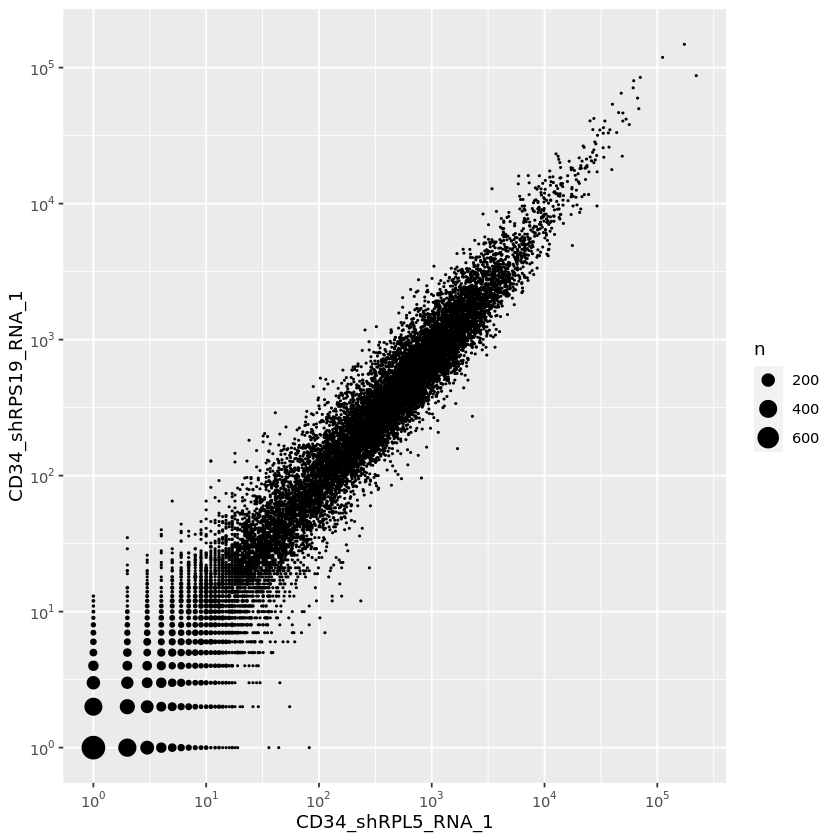

In [286]:
data %>%
  select(CD34_shRPL5_RNA_1, CD34_shRPS19_RNA_1) %>% #only two columns selected
  drop_na %>% #drop missing values with NA
  filter(CD34_shRPL5_RNA_1 != 0 & CD34_shRPS19_RNA_1 != 0) %>% # remove 0's 
  ggplot(aes(x = CD34_shRPL5_RNA_1, y = CD34_shRPS19_RNA_1))+ #plot data
  geom_count(na.rm = TRUE) + # counts overlapping points, size of dot == number overlapping points
  scale_size_area() + # counts of zero given size 0
  # scale axes to log10 and label tick marks
  scale_x_log10(
    breaks = scales::trans_breaks("log10", function(x) 10^x), #sets axis tick mark intervals
    labels = scales::trans_format("log10", scales::math_format(10^.x)) #label format for tick marks
  ) +
  scale_y_log10(
    breaks = scales::trans_breaks("log10", function(x) 10^x),
    labels = scales::trans_format("log10", scales::math_format(10^.x))
  )



**In problems 4 through 6, assign the result of your operation back to the `data`
variable.**

## Problem 4

**10 points**

Write a code cell to select the following columns from the `data` variable you created above and reassign back to `data`.

Columns to select: `ensembl_gene_id`, columns that have either `RPL5`, `RPS19`, or `Luc` in their name.

Instead of listing every column, use [`matches`](https://tidyselect.r-lib.org/reference/starts_with.html) and a succinct [regular expression](https://stringr.tidyverse.org/articles/regular-expressions.html) to select the above columns.

In [287]:
data <- data %>% #reassign back to data
    select(ensembl_gene_id,(matches("(RPL5|RPS19|Luc)"))) %>% #select ensembl_gene_id and columns matching regex
    print()

# A tibble: 63,677 × 13
   ensembl_gene_id CD34_shRPL5_RNA_1 CD34_shRPL5_RNA_2 CD34_shRPL5_RPF_1
   <chr>                       <dbl>             <dbl>             <dbl>
 1 ENSG00000000003                40                49                 6
 2 ENSG00000000005                 0                 0                 0
 3 ENSG00000000419              1116              1000               101
 4 ENSG00000000457               149               126                14
 5 ENSG00000000460               289               268                52
 6 ENSG00000000938               204               145                17
 7 ENSG00000000971               241               203                45
 8 ENSG00000001036              1487               936               182
 9 ENSG00000001084              1036              1224               134
10 ENSG00000001167               498               557                75
# … with 63,667 more rows, and 9 more variables: CD34_shRPL5_RPF_2 <dbl>,
#   CD34_shRPS19_RNA_1 <db

## Problem 5

**10 points**

Write a code cell to filter the result from Problem 4 to include only rows where each of the 12 numerical columns you selected has 50 counts or more  and reassign back to `data`.
This is a simple way to avoid genes that have very low counts.

You might be tempted to do this step separately for each of the 12 columns, but instead use the `across` function you learned above or the `pivot_longer` function from the class (either way is fine).

In [288]:
data <- data %>%  #reassign back to data
#use if_all rather than across to avoid warning message
    filter(if_all(is.numeric, ~.>= 50))%>% #filters out numeric values below 50
    print()

# A tibble: 4,239 × 13
   ensembl_gene_id CD34_shRPL5_RNA_1 CD34_shRPL5_RNA_2 CD34_shRPL5_RPF_1
   <chr>                       <dbl>             <dbl>             <dbl>
 1 ENSG00000000419              1116              1000               101
 2 ENSG00000001036              1487               936               182
 3 ENSG00000001084              1036              1224               134
 4 ENSG00000001497              1436              1231               253
 5 ENSG00000002549              1228              1186               285
 6 ENSG00000002586              2746              1600               260
 7 ENSG00000002834              4346              3800               254
 8 ENSG00000003056              1379              1661               321
 9 ENSG00000003393               832               690                84
10 ENSG00000003402              1836              1382                95
# … with 4,229 more rows, and 9 more variables: CD34_shRPL5_RPF_2 <dbl>,
#   CD34_shRPS19_RNA_1 <dbl>

## Problem 6

**10 points**

Write a code cell to divide each of the 12 numerical columns by the
corresponding median value for each column
and reassign back to `data`. This median normalization is typically done in
high-throughput experiments after filtering
to normalize for sample-to-sample difference in read depth.

Again, you can write lot less code if you use the `mutate` and `across` function
you learned above.


In [289]:
data <- data %>% #reassign back to data
    na.omit(data)%>% #omit NA values
    mutate(across(is.numeric,~(./median(.)))) %>% #normalize columns by dividing row by column median 
    print()

# A tibble: 4,239 × 13
   ensembl_gene_id CD34_shRPL5_RNA_1 CD34_shRPL5_RNA_2 CD34_shRPL5_RPF_1
   <chr>                       <dbl>             <dbl>             <dbl>
 1 ENSG00000000419             0.817             0.832             0.620
 2 ENSG00000001036             1.09              0.779             1.12 
 3 ENSG00000001084             0.758             1.02              0.822
 4 ENSG00000001497             1.05              1.02              1.55 
 5 ENSG00000002549             0.899             0.987             1.75 
 6 ENSG00000002586             2.01              1.33              1.60 
 7 ENSG00000002834             3.18              3.16              1.56 
 8 ENSG00000003056             1.01              1.38              1.97 
 9 ENSG00000003393             0.609             0.574             0.515
10 ENSG00000003402             1.34              1.15              0.583
# … with 4,229 more rows, and 9 more variables: CD34_shRPL5_RPF_2 <dbl>,
#   CD34_shRPS19_RNA_1 <dbl>

## Problem 7

**10 points**

After we do the above filtering and median-normalization, let us calculate
translation efficiency as the average ratio of the RPF and RNA reads for each
treatment condition. Then we calculate how this translation efficiency changes
between target (`rpl5` and `rps19`) and control (`luc`) shRNAs.

The code implementing the above steps is shown below, but it has a few
errors. Correct them.


In [290]:
lfc <- data %>% #assign to lfc
  #new column mean RP15 translation efficiency with mean RPF/ mean RNA
  mutate(mean_rpl5_te = ((CD34_shRPL5_RPF_1 + CD34_shRPL5_RPF_2) / (CD34_shRPL5_RNA_1 + CD34_shRPL5_RNA_2))) %>%
  #new column mean RPS19 translation efficiency with mean RPF/ mean RNA
  mutate(mean_rps19_te = ((CD34_shRPS19_RPF_1 + CD34_shRPS19_RPF_2) / (CD34_shRPS19_RNA_1 + CD34_shRPS19_RNA_2))) %>%
  #new column mean Luc translation efficiency with mean RPF/ mean RNA
  mutate(mean_shluc_te = ((CD34_shLuc_RPF_1 + CD34_shLuc_RPF_2) / (CD34_shLuc_RNA_1 + CD34_shLuc_RNA_2))) %>%
  # select new columns
  select(ensembl_gene_id, mean_rpl5_te, mean_rps19_te, mean_shluc_te) %>%
  # new columns with log2 normalized to rpl5 and rps19 
  mutate(lfc_te_rpl5 = log2(mean_rpl5_te / mean_shluc_te)) %>%
  mutate(lfc_te_rps19 = log2(mean_rps19_te / mean_shluc_te)) %>%

  print()

# A tibble: 4,239 × 6
   ensembl_gene_id mean_rpl5_te mean_rps19_te mean_shluc_te lfc_te_rpl5
   <chr>                  <dbl>         <dbl>         <dbl>       <dbl>
 1 ENSG00000000419        0.919         1.49          1.08       -0.239
 2 ENSG00000001036        1.17          1.11          1.45       -0.316
 3 ENSG00000001084        1.02          1.14          0.853       0.258
 4 ENSG00000001497        1.38          1.04          1.75       -0.338
 5 ENSG00000002549        1.78          1.87          1.50        0.245
 6 ENSG00000002586        0.903         0.825         1.14       -0.331
 7 ENSG00000002834        0.479         0.394         0.519      -0.115
 8 ENSG00000003056        1.87          1.87          1.02        0.882
 9 ENSG00000003393        0.831         1.20          0.462       0.847
10 ENSG00000003402        0.505         0.427         0.344       0.552
# … with 4,229 more rows, and 1 more variable: lfc_te_rps19 <dbl>


## Problem 8

**10 points**

Write code that will create a new dataframe called `mean_lfc` from `lfc`
containing a new column called `avg_lfc`.
`avg_lfc` should be the average of the log2 fold-change in TE (`lfc_te`) upon
knockdown of RPL5 and RPS19.

Then select only the gene id column and the new column that you just created
(this will be your new dataframe `mean_lfc`).


In [291]:
mean_lfc <- lfc %>% #assign to mean lfc 
    mutate(avg_lfc = (lfc_te_rpl5 + lfc_te_rps19)/2) %>% # mean of rpl15 and rps19 log2 fold change translational efficiency
    select(ensembl_gene_id, avg_lfc) %>% #select gene id and new column
    print()

# A tibble: 4,239 × 2
   ensembl_gene_id avg_lfc
   <chr>             <dbl>
 1 ENSG00000000419   0.110
 2 ENSG00000001036  -0.355
 3 ENSG00000001084   0.337
 4 ENSG00000001497  -0.543
 5 ENSG00000002549   0.280
 6 ENSG00000002586  -0.396
 7 ENSG00000002834  -0.256
 8 ENSG00000003056   0.880
 9 ENSG00000003393   1.11 
10 ENSG00000003402   0.431
# … with 4,229 more rows



## Problem 9

**10 points**

Write code to join the `mean_lfc` dataframe with the `annotations` dataframe created
at the top of the document and assign back to `mean_lfc`.


In [292]:
mean_lfc <- mean_lfc %>% #reassign back to mean_lfc
    inner_join (annotations, by='ensembl_gene_id')%>% #join mean_lfc and annotations with rows matching ensembl_gene_id
    print()




# A tibble: 4,205 × 6
   ensembl_gene_id avg_lfc symbol name                        gene_group ccds_id
   <chr>             <dbl> <chr>  <chr>                       <chr>      <chr>  
 1 ENSG00000000419   0.110 DPM1   dolichyl-phosphate mannosy… Glycosylt… CCDS82…
 2 ENSG00000001036  -0.355 FUCA2  alpha-L-fucosidase 2        Alpha-L-f… CCDS52…
 3 ENSG00000001084   0.337 GCLC   glutamate-cysteine ligase … NA         CCDS75…
 4 ENSG00000001497  -0.543 LAS1L  LAS1 like ribosome biogene… Large rib… CCDS55…
 5 ENSG00000002549   0.280 LAP3   leucine aminopeptidase 3    Aminopept… CCDS34…
 6 ENSG00000002586  -0.396 CD99   CD99 molecule (Xg blood gr… Blood gro… CCDS83…
 7 ENSG00000002834  -0.256 LASP1  LIM and SH3 protein 1       LIM domai… CCDS11…
 8 ENSG00000003056   0.880 M6PR   mannose-6-phosphate recept… MRH domai… CCDS73…
 9 ENSG00000003393   1.11  ALS2   alsin Rho guanine nucleoti… Dbl famil… CCDS46…
10 ENSG00000003402   0.431 CFLAR  CASP8 and FADD like apopto… Receptor … CCDS23…
# … wi

## Problem 10

**10 points**

1. Write code to select only the bottom 10 genes with the lowest `avg_lfc` and display the gene `symbol`, gene `name` and `avg_lfc` for these genes.
2. Create a figure using `ggplot2` to visualize these results.

Write a few sentences to justify the choices you made when creating your figure.

# A tibble: 10 × 3
   symbol name                                       avg_lfc
   <chr>  <chr>                                        <dbl>
 1 H2AC6  H2A clustered histone 6                      -2.95
 2 H2BC12 H2B clustered histone 12                     -2.79
 3 RPS15  ribosomal protein S15                        -2.27
 4 COX8A  cytochrome c oxidase subunit 8A              -2.02
 5 RPL18A ribosomal protein L18a                       -2.01
 6 RPLP1  ribosomal protein lateral stalk subunit P1   -2.01
 7 H2AX   H2A.X variant histone                        -1.86
 8 RPS26  ribosomal protein S26                        -1.85
 9 APOE   apolipoprotein E                             -1.68
10 RPL7A  ribosomal protein L7a                        -1.68


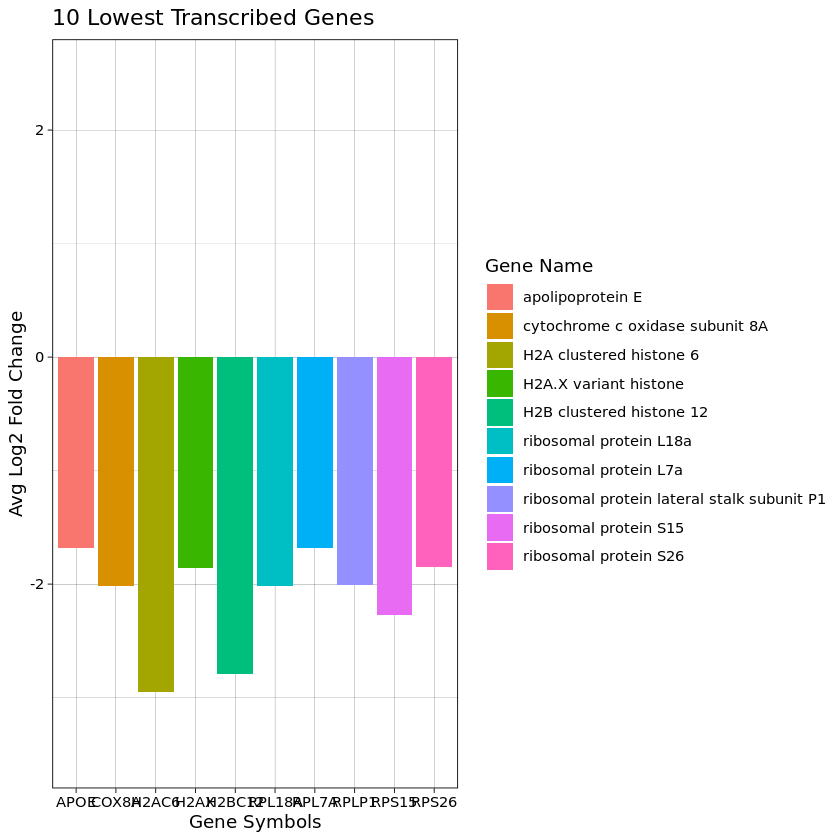

In [295]:
mean_lfc %>%
    arrange(avg_lfc)%>% #orders list of genes based on mean_lfc df by descending order of avg_lfc
    #arrange(-avg_lfc)%>% # gives descending order, or top genes
    slice(1:10)%>% # lowest 10 expressing genes
    select(symbol, name, avg_lfc)%>% # display columns of choice, to be used in plots
    print()%>%

    ggplot(aes(symbol, avg_lfc, fill=name)) + # plot with gene symbol, avg 
    geom_col() + # creates a bar chart with heights representing values
    labs(title='10 Lowest Transcribed Genes', x='Gene Symbols', y='Avg Log2 Fold Change', fill = 'Gene Name') + # name plot titles and axes
    #make y axis between -3 and 3
     scale_y_continuous(limit = c(-3.5, 2.5)) + # y axis range; values known from avg_lfc column
    #make linedraw shows gride to more easily see bar heights
    theme_linedraw()
